# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [18]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [273]:
import pandas as pd
import random 
from faker import Faker
import matplotlib.pyplot as plt

fake = Faker()

In [120]:
Emp_id = []
Name = []
LastName = []
phone = []
index = []
for i in range(10000):
    index.append(i)
    Name.append(fake.first_name())
    LastName.append(fake.last_name())
    phone.append(fake.unique.random_int(1000000000 , 9999999999))
    Emp_id.append(fake.unique.random_int(10000 ,99999))

In [142]:
import random 

options = ['Connecticut', 'Delaware', 'Florida', 'Georgia', 'Maine', 'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina','Virginia']
simulations = [random.choice(options) for _ in range(10000)]


In [243]:
d = {'index' : index,'Emp_id' : Emp_id, 'Name': Name, 'LastName': LastName, 'phone': phone, 'State' : simulations}

df = pd.DataFrame(d)  

In [244]:
df

,index,Emp_id,Name,LastName,phone,State
0,0,87062,Gabriel,Jefferson,5585356690,New Jersey
1,1,85269,Carolyn,Heath,9861939662,Maine
2,2,31391,Rickey,Cruz,3453621351,North Carolina
3,3,14683,Matthew,Ruiz,6445622552,Maryland
4,4,39850,James,Jones,5462646352,Georgia
...,...,...,...,...,...,...
9995,9995,16871,Gilbert,Fox,4357565505,Maine
9996,9996,78571,Jessica,Wood,4839527846,New Hampshire
9997,9997,19453,Christopher,Pittman,2585592104,Georgia
9998,9998,54167,Jessica,Ruiz,9381496499,Rhode Island


In [245]:

d_id = [random.randint(1, 9) for _ in range(10000)]
A_s =[random.randint(40000, 99999) for _ in range(10000)]

In [246]:
d2 = {'Emp_id' : Emp_id, 'Department_ID': d_id, 'Annual_salary': A_s}
df2 = pd.DataFrame(d2)  

In [247]:
df2

,Emp_id,Department_ID,Annual_salary
0,87062,1,72271
1,85269,1,86083
2,31391,3,87209
3,14683,6,65780
4,39850,7,73796
...,...,...,...
9995,16871,7,81712
9996,78571,8,87889
9997,19453,4,97978
9998,54167,6,84676


In [248]:
D_N = {1:'COMPUTER SCIENCES' , 2:'ELECTRONICS' , 3:'HEALTH INFORMATION' , 4:'MECHANICAL', 5:'CIVIL' , 6:'COMMUNICATION' , 7:'DATA SCIENCE', 8:'ROBOTICS' , 9:'MANAGEMENT'}

In [249]:
df3 = pd.DataFrame(list(D_N.items()),columns = ['Department_ID','Department_name'])

In [250]:
df3

,Department_ID,Department_name
0,1,COMPUTER SCIENCES
1,2,ELECTRONICS
2,3,HEALTH INFORMATION
3,4,MECHANICAL
4,5,CIVIL
5,6,COMMUNICATION
6,7,DATA SCIENCE
7,8,ROBOTICS
8,9,MANAGEMENT


In [251]:
df4 = pd.merge(df, df2)
df4

,index,Emp_id,Name,LastName,phone,State,Department_ID,Annual_salary
0,0,87062,Gabriel,Jefferson,5585356690,New Jersey,1,72271
1,1,85269,Carolyn,Heath,9861939662,Maine,1,86083
2,2,31391,Rickey,Cruz,3453621351,North Carolina,3,87209
3,3,14683,Matthew,Ruiz,6445622552,Maryland,6,65780
4,4,39850,James,Jones,5462646352,Georgia,7,73796
...,...,...,...,...,...,...,...,...
9995,9995,16871,Gilbert,Fox,4357565505,Maine,7,81712
9996,9996,78571,Jessica,Wood,4839527846,New Hampshire,8,87889
9997,9997,19453,Christopher,Pittman,2585592104,Georgia,4,97978
9998,9998,54167,Jessica,Ruiz,9381496499,Rhode Island,6,84676


In [252]:
df5 = pd.merge(df3, df4)
df5

,Department_ID,Department_name,index,Emp_id,Name,LastName,phone,State,Annual_salary
0,1,COMPUTER SCIENCES,0,87062,Gabriel,Jefferson,5585356690,New Jersey,72271
1,1,COMPUTER SCIENCES,1,85269,Carolyn,Heath,9861939662,Maine,86083
2,1,COMPUTER SCIENCES,6,58237,Lisa,Charles,6744222121,Pennsylvania,64248
3,1,COMPUTER SCIENCES,7,79721,Monica,Park,4143146037,Maryland,83098
4,1,COMPUTER SCIENCES,15,46171,Philip,Duffy,1494588581,New Hampshire,42240
...,...,...,...,...,...,...,...,...,...
9995,9,MANAGEMENT,9946,73112,Joshua,Dominguez,6283718408,Maine,81573
9996,9,MANAGEMENT,9965,71789,Kyle,Miller,3898411786,Florida,65669
9997,9,MANAGEMENT,9973,68704,Sarah,Rose,3674004039,New York,48112
9998,9,MANAGEMENT,9980,79048,Ashley,Brooks,3953768044,Florida,59139


In [253]:
g_df1 = df5.groupby('Department_name')

In [254]:
count = 0
for Hour, group in g_df1:
    count = count +1
    print(Department_name)
    print(group, "\n")
print(count)

['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II']
      Department_ID Department_name  index  Emp_id     Name    LastName  \
4435              5           CIVIL      9   23240  Michael      Baxter   
4436              5           CIVIL     12   36230    Shari        Howe   
4437              5           CIVIL     14   83162    Nancy     Daniels   
4438              5           CIVIL     17   74605  Charles  Livingston   
4439              5           CIVIL     51   92432   Mariah      Reeves   
...             ...             ...    ...     ...      ...         ...   
5501              5           CIVIL   9966   59323  Anthony       Burns   
5502              5           CIVIL   9968   76897   Deanna      Hanson   
5503              5           CIVIL   9970   47870    Jenny        Owen   
5504              5           CIVIL   9989   35911   Amanda     Hawkins   
5505              5           CIVIL   9994   23093    Patty        Park   

           phone           State  Annual_sal

Text(0, 0.5, 'Annual_salary')

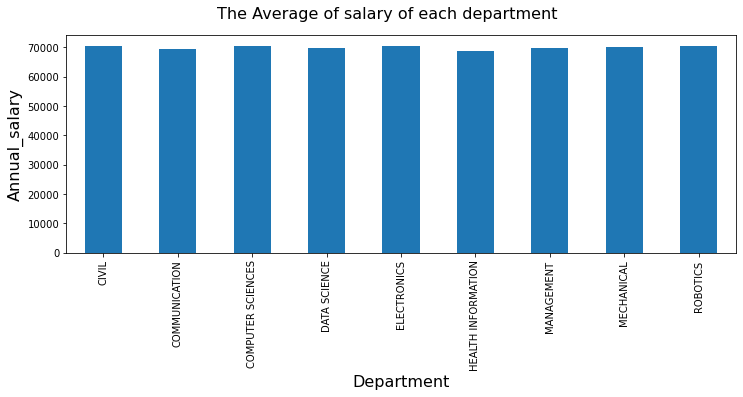

In [277]:
fig, axs = plt.subplots(figsize=(12, 4))
g_df2 = df5.groupby('Department_name')["Annual_salary"].mean().plot(kind='bar', rot=90, ax=axs)
fig.suptitle('The Average of salary of each department ',fontsize=16)
plt.xlabel("Department",fontsize=16)
plt.ylabel("Annual_salary",fontsize=16)

In [262]:
g_df3 = df5.groupby(['State','Department_name'])

In [263]:
count = 0
for Hour, group in g_df3:
    count = count +1
    #print(Department_name)
    print(group, "\n")
print(count)

      Department_ID Department_name  index  Emp_id       Name  LastName  \
4454              5           CIVIL    148   57518       Lisa      Reid   
4455              5           CIVIL    165   78139     Joshua      Leon   
4504              5           CIVIL    617   63422      Kevin      Webb   
4507              5           CIVIL    710   16853    Timothy    Miller   
4542              5           CIVIL    979   24978      Jacob   Shaffer   
...             ...             ...    ...     ...        ...       ...   
5416              5           CIVIL   9076   60167      Scott   Everett   
5458              5           CIVIL   9574   67133    Rebecca   Sanders   
5464              5           CIVIL   9633   10859     Judith  Williams   
5480              5           CIVIL   9759   19245    Barbara    Tucker   
5491              5           CIVIL   9840   75303  Elizabeth  Anderson   

           phone        State  Annual_salary  
4454  4577135504  Connecticut          96964  
4455 

      Department_ID    Department_name  index  Emp_id     Name   LastName  \
0                 1  COMPUTER SCIENCES      0   87062  Gabriel  Jefferson   
11                1  COMPUTER SCIENCES     89   84612     Marc     Hansen   
13                1  COMPUTER SCIENCES    115   95082  Timothy       Mata   
27                1  COMPUTER SCIENCES    226   70771   Amanda  Stevenson   
34                1  COMPUTER SCIENCES    281   66862    Renee       Gill   
...             ...                ...    ...     ...      ...        ...   
1033              1  COMPUTER SCIENCES   9057   10688     Judy     Brooks   
1039              1  COMPUTER SCIENCES   9111   56404  Melinda       Boyd   
1058              1  COMPUTER SCIENCES   9375   68040   Austin       Reed   
1061              1  COMPUTER SCIENCES   9411   52704    Paula      Chang   
1115              1  COMPUTER SCIENCES   9908   38884  Matthew    Herring   

           phone       State  Annual_salary  
0     5585356690  New Jersey 

      Department_ID Department_name  index  Emp_id     Name   LastName  \
7786              8        ROBOTICS     91   77463  Patrick    Pittman   
7788              8        ROBOTICS    102   12379  Timothy  Rodriguez   
7792              8        ROBOTICS    141   88112    Julie     Moreno   
7795              8        ROBOTICS    145   98278   Marisa   Anderson   
7801              8        ROBOTICS    190   18175    Jerry    Bennett   
...             ...             ...    ...     ...      ...        ...   
8903              8        ROBOTICS   9595   41497  Yolanda     Holmes   
8906              8        ROBOTICS   9617   30033  Bradley     Brooks   
8917              8        ROBOTICS   9706   14616   Andrew     Howell   
8922              8        ROBOTICS   9750   37967    Jared   Thompson   
8931              8        ROBOTICS   9827   64304     Tony      Myers   

           phone     State  Annual_salary  
7786  4983373348  Virginia          83224  
7788  8199695502  Virgi

Text(0, 0.5, 'No of Employees in each department and state')

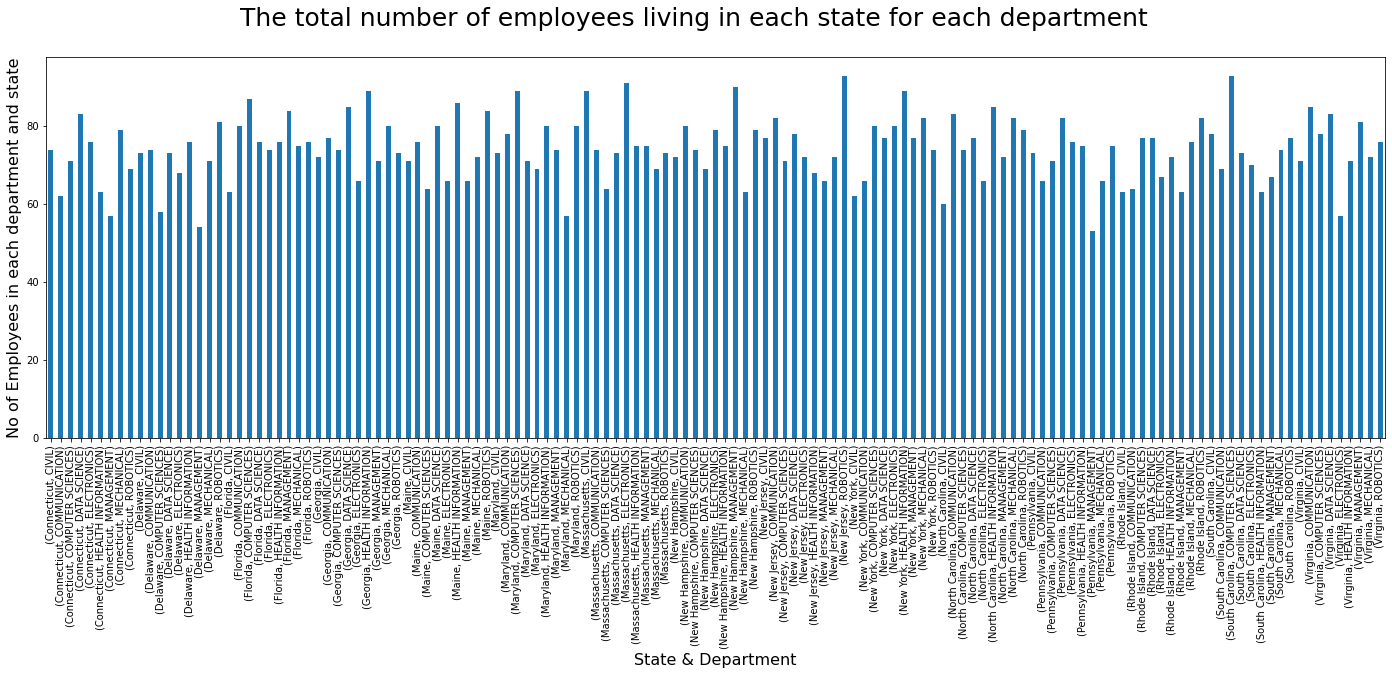

In [272]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(24, 7))
g_df3.size().plot(kind='bar', rot=90, ax=axs)
fig.suptitle('The total number of employees living in each state for each department',fontsize=25)
plt.xlabel("State & Department",fontsize=16)
plt.ylabel("No of Employees in each department and state",fontsize=16)

Text(0, 0.5, 'Annual_salary')

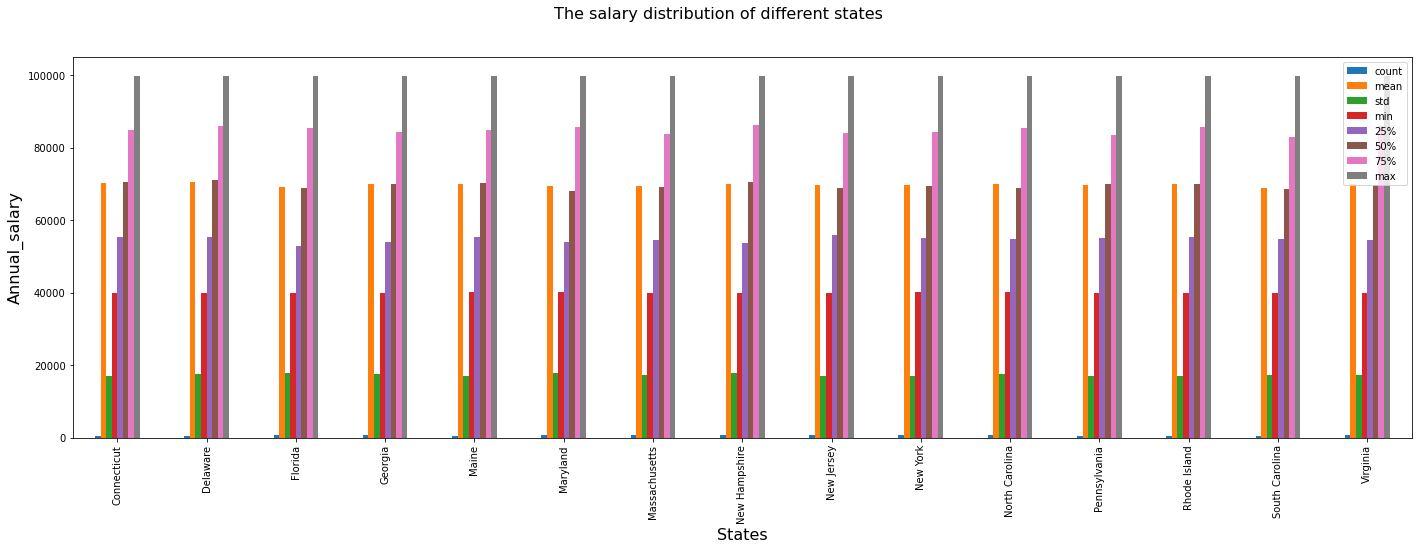

In [280]:
fig, axs = plt.subplots(figsize=(24, 7))
g_df4 = df5.groupby('State')["Annual_salary"].describe().plot(kind='bar', rot=90, ax=axs)
fig.suptitle('The salary distribution of different states ',fontsize=16)
plt.xlabel("States",fontsize=16)
plt.ylabel("Annual_salary",fontsize=16)

Text(0, 0.5, 'Annual_salary')

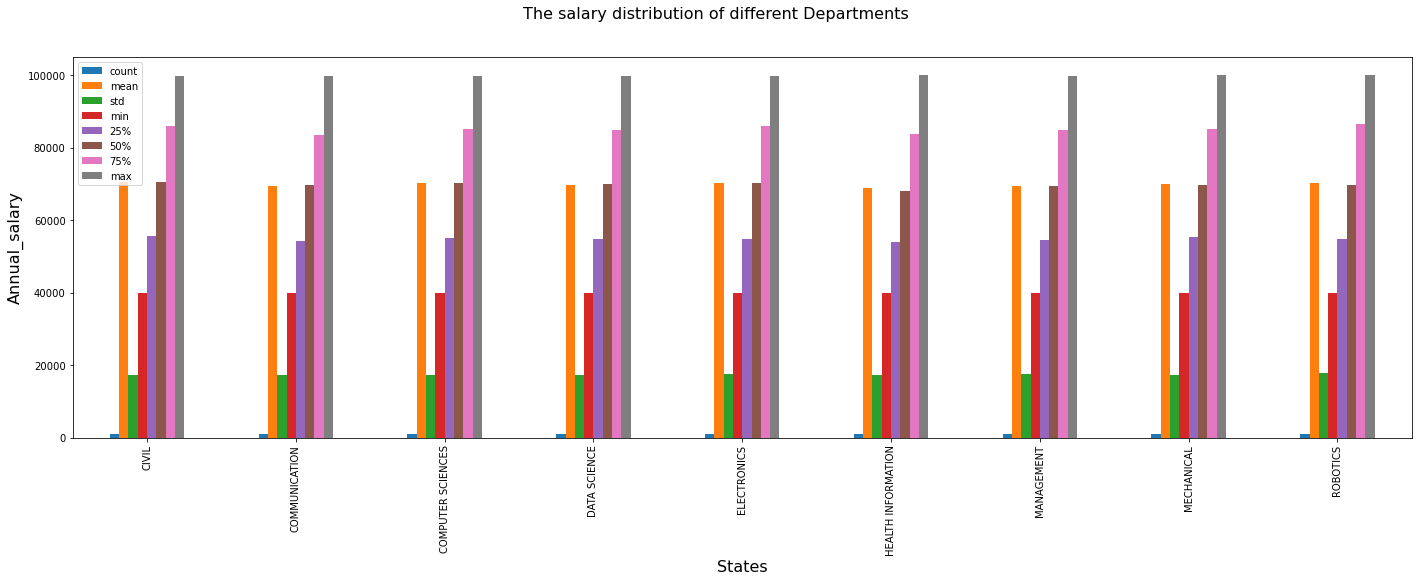

In [281]:
fig, axs = plt.subplots(figsize=(24, 7))
g_df4 = df5.groupby('Department_name')["Annual_salary"].describe().plot(kind='bar', rot=90, ax=axs)
fig.suptitle('The salary distribution of different Departments  ',fontsize=16)
plt.xlabel("States",fontsize=16)
plt.ylabel("Annual_salary",fontsize=16)